# Client goal
The Southern Cape Provincial Education Department (__fictitious!__) wants to achieve major improvements in both the quantity and quality of early childhood development (ECD) programmes for its children. They particularly want assistance in analysing the data they have collected on the ECD programmes in their province and using it to plan operations for the year ahead.

## Description of situation
ECD or early learning programmes (e.g. preschools, creches, daymothers, etc.) in the Southern Cape are provided by a mixture of public, private and NPO organisations which admit children from age 0-5. The National Education Department is responsible for 
registering, funding and monitoring these organisations and organises this through its 5 Districts. 

ECD services must be registered as Partial Care Facilities (PCR Registration) and as ECD Programmes (Programme Registration). These registrations expire in a maximum of 5 years. 

Registered ECD Programmes can be funded through two funding streams – the equitable share subsidy and the conditional grant subsidy. These pay on a per/child per/day basis at R17 per child per day for 264 days a year.

### Import Data

In [448]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import plot
from plotnine import *

from skimpy import skim

In [449]:
# Import data
df = pd.read_csv('./data/SCape Extract_Case Study Data_To Share.csv')
print(df.shape)
df.head()

(922, 25)


,Province,ECD_Name,Clasification,Service Type,newOrRenewal,Registration Type,Partial Care Registration (PCR) Status,PCR Level,PCR Certificate Number,PCR issueDate,...,Prog Certificate Number,Land Owner,Building Owner,District Name,Fee Level,No. Children Enrolled,Equitable Share Subsidy,Children Subsidised Equitable Share,Conditional Grant Subsidy,Children Subsided Conditional Grant
0,Southern Cape,ECD 1,Centre based,ECD centre,Renewal,ECD Programme in Partial Care Facility,Fully registered,GOLD,DC 20/00,2019/12/19,...,NaN,Religious institution (e.g. church mosque),Religious institution (e.g. church mosque),Disitrct 1,1.0,35.0,Yes,40.0,Yes,40.0
1,Southern Cape,ECD 2,Centre based,ECD centre,Renewal,ECD Programme in Partial Care Facility,Fully registered,GOLD,DC 07/21,2021/03/31,...,NaN,NaN,NaN,Disitrct 3,1.0,NaN,No,NaN,No,NaN
2,Southern Cape,ECD 3,Centre based,ECD centre,NaN,NaN,Not registered,NaN,NaN,NaN,...,NaN,Not-for profit organisation,Not-for profit organisation,Disitrct 2,2.0,31.0,No,NaN,No,NaN
3,Southern Cape,ECD 4,Centre based,ECD centre,Renewal,ECD Programme in Partial Care Facility,Conditionally registered,BRONZE,DC 03/18,2019/09/25,...,NaN,Communal land (traditional),The ECD Programme,Disitrct 3,1.0,23.0,Yes,23.0,Yes,23.0
4,Southern Cape,ECD 5,Centre based,ECD centre,NaN,NaN,Not registered,NaN,NaN,NaN,...,NaN,Municipality,Municipality,Disitrct 2,2.0,5.0,No,NaN,No,NaN


###  Prepare Data

#### Clean Names

In [450]:
# Preprocessing
# Original column names
print("Original Column Names:")
print(df.columns)

# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str.lower().str.replace('.', '')

# Updated column names
print("\nCleaned Column Names:")
print(df.columns)

Original Column Names:
Index(['Province', 'ECD_Name', 'Clasification', 'Service Type', 'newOrRenewal',
       'Registration Type', 'Partial Care Registration (PCR) Status',
       'PCR Level', 'PCR Certificate Number', 'PCR issueDate',
       'PCR expiryDate', 'Prog Registration Status', 'Prog Registration Level',
       'Prog Registration issueDate', 'Prog Registration expiryDate',
       'Prog Certificate Number', 'Land Owner', 'Building Owner',
       'District Name', 'Fee Level', 'No. Children Enrolled',
       'Equitable Share Subsidy', 'Children Subsidised Equitable Share',
       'Conditional Grant Subsidy', 'Children Subsided Conditional Grant'],
      dtype='object')

Cleaned Column Names:
Index(['province', 'ecd_name', 'clasification', 'service_type', 'neworrenewal',
       'registration_type', 'partial_care_registration_(pcr)_status',
       'pcr_level', 'pcr_certificate_number', 'pcr_issuedate',
       'pcr_expirydate', 'prog_registration_status', 'prog_registration_level',

C:\Users\Eddie\AppData\Local\Temp\ipykernel_3316\3351110408.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


#### Check Data quality

In [451]:
df.columns

Index(['province', 'ecd_name', 'clasification', 'service_type', 'neworrenewal',
       'registration_type', 'partial_care_registration_(pcr)_status',
       'pcr_level', 'pcr_certificate_number', 'pcr_issuedate',
       'pcr_expirydate', 'prog_registration_status', 'prog_registration_level',
       'prog_registration_issuedate', 'prog_registration_expirydate',
       'prog_certificate_number', 'land_owner', 'building_owner',
       'district_name', 'fee_level', 'no_children_enrolled',
       'equitable_share_subsidy', 'children_subsidised_equitable_share',
       'conditional_grant_subsidy', 'children_subsided_conditional_grant'],
      dtype='object')

Date features are taken as objects therefore reformatting these columns is required. Identified columns are: `PCR issueDate`, `PCR expiryDate`, `Prog Registration issueDate` and `Prog Registration expiryDate`.

In [452]:
# Assuming your DataFrame is called df and contains the columns mentioned
date_columns = ['pcr_issuedate', 'pcr_expirydate', 'prog_registration_issuedate', 'pcr_issuedate', 'prog_registration_expirydate']

# Convert date columns to datetime format
for col in date_columns:
    # Convert the column to datetime data type
    df[col] = pd.to_datetime(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   province                                922 non-null    object        
 1   ecd_name                                922 non-null    object        
 2   clasification                           876 non-null    object        
 3   service_type                            879 non-null    object        
 4   neworrenewal                            232 non-null    object        
 5   registration_type                       235 non-null    object        
 6   partial_care_registration_(pcr)_status  853 non-null    object        
 7   pcr_level                               189 non-null    object        
 8   pcr_certificate_number                  207 non-null    object        
 9   pcr_issuedate                           191 non-null  

#### Drop irrelevant features

Features such as `land_owner`, `building_owner` and `prog_registration_number` are not relevant in addressing the problem at hand. Thes features are dropped.

In [453]:
irrelevant_features = ['land_owner', 'building_owner', 'prog_certificate_number']
df.drop(columns=irrelevant_features, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   province                                922 non-null    object        
 1   ecd_name                                922 non-null    object        
 2   clasification                           876 non-null    object        
 3   service_type                            879 non-null    object        
 4   neworrenewal                            232 non-null    object        
 5   registration_type                       235 non-null    object        
 6   partial_care_registration_(pcr)_status  853 non-null    object        
 7   pcr_level                               189 non-null    object        
 8   pcr_certificate_number                  207 non-null    object        
 9   pcr_issuedate                           191 non-null  

In [454]:
df.head()

,province,ecd_name,clasification,service_type,neworrenewal,registration_type,partial_care_registration_(pcr)_status,pcr_level,pcr_certificate_number,pcr_issuedate,...,prog_registration_level,prog_registration_issuedate,prog_registration_expirydate,district_name,fee_level,no_children_enrolled,equitable_share_subsidy,children_subsidised_equitable_share,conditional_grant_subsidy,children_subsided_conditional_grant
0,Southern Cape,ECD 1,Centre based,ECD centre,Renewal,ECD Programme in Partial Care Facility,Fully registered,GOLD,DC 20/00,2019-12-19,...,GOLD,2019-12-19,2024-12-31,Disitrct 1,1.0,35.0,Yes,40.0,Yes,40.0
1,Southern Cape,ECD 2,Centre based,ECD centre,Renewal,ECD Programme in Partial Care Facility,Fully registered,GOLD,DC 07/21,2021-03-31,...,GOLD,2021-03-31,2026-03-31,Disitrct 3,1.0,NaN,No,NaN,No,NaN
2,Southern Cape,ECD 3,Centre based,ECD centre,NaN,NaN,Not registered,NaN,NaN,NaT,...,NaN,NaT,NaT,Disitrct 2,2.0,31.0,No,NaN,No,NaN
3,Southern Cape,ECD 4,Centre based,ECD centre,Renewal,ECD Programme in Partial Care Facility,Conditionally registered,BRONZE,DC 03/18,2019-09-25,...,BRONZE,2019-09-25,2023-09-25,Disitrct 3,1.0,23.0,Yes,23.0,Yes,23.0
4,Southern Cape,ECD 5,Centre based,ECD centre,NaN,NaN,Not registered,NaN,NaN,NaT,...,NaN,NaT,NaT,Disitrct 2,2.0,5.0,No,NaN,No,NaN


In [455]:
# Check missing values
df.isnull().sum()/len(df)

province                                  0.000000
ecd_name                                  0.000000
clasification                             0.049892
service_type                              0.046638
neworrenewal                              0.748373
registration_type                         0.745119
partial_care_registration_(pcr)_status    0.074837
pcr_level                                 0.795011
pcr_certificate_number                    0.775488
pcr_issuedate                             0.792842
pcr_expirydate                            0.792842
prog_registration_status                  0.080260
prog_registration_level                   0.796095
prog_registration_issuedate               0.793926
prog_registration_expirydate              0.793926
district_name                             0.009761
fee_level                                 0.023861
no_children_enrolled                      0.124729
equitable_share_subsidy                   0.000000
children_subsidised_equitable_s

## Exercise 1 Question:
Using the extract of fictitious data that has been provided develop a registration dashboard that shows registration status by district. 

___(When presenting back this dashboard in interview phase you will help the ECD Director to see how the dashboard can help to target efforts for registration.)___

In [456]:
df_grouped = (
    df.groupby(['district_name', 'partial_care_registration_(pcr)_status'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)
df_grouped

partial_care_registration_(pcr)_status,district_name,Conditionally registered,Fully registered,In process,Lapsed registration,Not registered
0,Disitrct 1,34,16,0,2,46
1,Disitrct 2,9,62,49,5,139
2,Disitrct 3,32,84,18,18,100
3,Disitrct 4,11,16,0,15,27
4,Disitrct 5,38,5,2,12,113


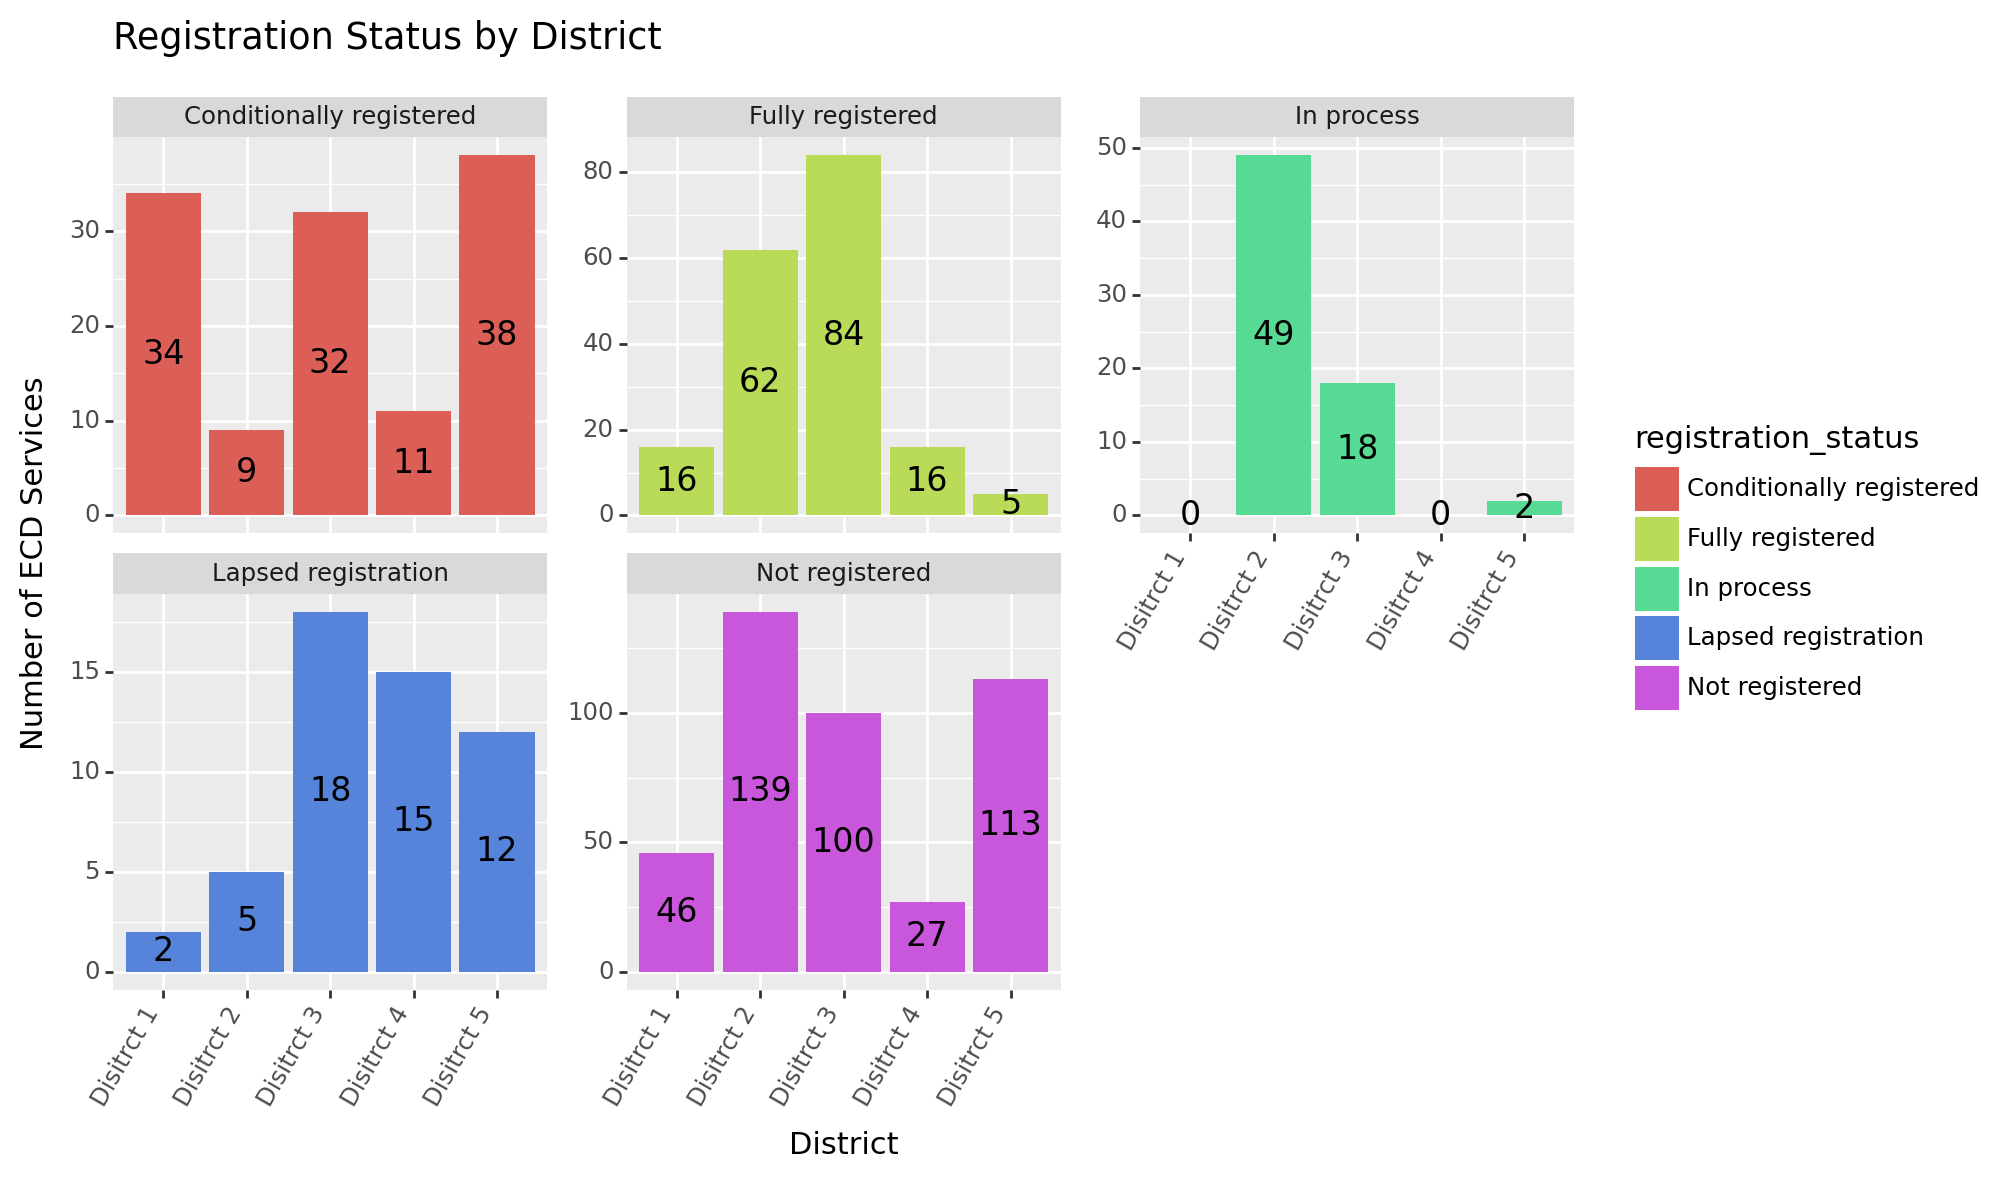

In [457]:

# Convert dataframe to long format for easier plotting
df_long = df_grouped.melt(id_vars='district_name', var_name='registration_status', value_name='count')

# Plot using plotnine
p = (
    ggplot(df_long, aes(x='district_name', y='count', fill='registration_status')) + 
    geom_bar(stat='identity', position='stack') + facet_wrap('~registration_status', scales='free_y') +
    labs(title='Registration Status by District', x='District', y='Number of ECD Services') +
    theme(axis_text_x=element_text(rotation=60, hjust=1), figure_size=(10, 6))
)

# Add annotations
p = p + geom_text(aes(label='count'), position=position_stack(vjust=0.5), size=12)

print(p)

#### Reporting on target efforts to help ECD Director:

___Key Insights:___

Districts vary in the distribution of partial care registration statuses. Some districts have a higher proportion of fully registered facilities, indicating strong compliance with registration requirements.
In contrast, other districts have a significant number of facilities with lapsed registrations or are not registered, highlighting potential challenges in maintaining compliance and ensuring access to quality care.
District 2 stands out with a large number of facilities in process of registration, suggesting ongoing efforts to expand and register facilities to meet the needs of the community.

___Recommendations:___

Strengthen support and resources for facilities with lapsed registrations to help them regain compliance and provide uninterrupted services to children.
Continue efforts to streamline the registration process and provide assistance to facilities in process of registration to expedite the approval process.
Implement targeted interventions to address barriers to registration and compliance in districts with a high number of facilities not registered.


## Exercise 2 Question:
Develop a funding dashboard that compares the number of children accessing ECD programmes to the number that are funded through equitable share or conditional grant funding. 

___(In the interview phase: Given that only registered ECD programmes can be funded; and that Fee Level 1 programmes are the poorest, explain to the ECD Director what the data tells you about some ways to target and increase funding numbers assuming that there is budget available.)___

In [458]:
# Data analysis
total_children_accessing_ecd = df['no_children_enrolled'].sum()
total_funded_equitable_share = df['children_subsidised_equitable_share'].sum()
total_funded_conditional_grant = df['children_subsided_conditional_grant'].sum()

# Distribution of children across fee levels
fee_level_distribution = df.groupby('fee_level').sum()[['no_children_enrolled', 'children_subsidised_equitable_share', 'children_subsided_conditional_grant']]

fee_level_distribution = fee_level_distribution.reset_index()
fee_level_distribution

C:\Users\Eddie\AppData\Local\Temp\ipykernel_3316\50407138.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,fee_level,no_children_enrolled,children_subsidised_equitable_share,children_subsided_conditional_grant
0,1.0,14422.0,5014.0,5108.0
1,2.0,6970.0,279.0,325.0
2,3.0,3508.0,244.0,285.0
3,4.0,3212.0,28.0,28.0
4,5.0,1458.0,0.0,0.0


In [459]:
import plotly.graph_objs as go

# Create traces
trace1 = go.Bar(x=fee_level_distribution['fee_level'], y=fee_level_distribution['no_children_enrolled'], name='No Children Enrolled')
trace2 = go.Bar(x=fee_level_distribution['fee_level'], y=fee_level_distribution['children_subsidised_equitable_share'], name='Children Subsidised Equitable Share')
trace3 = go.Bar(x=fee_level_distribution['fee_level'], y=fee_level_distribution['children_subsided_conditional_grant'], name='Children Subsidised Conditional Grant')

# Create layout
layout = go.Layout(title='Comparison of Children Accessing ECD Programs and Funded Ones',
                   xaxis=dict(title='Fee Level'),
                   yaxis=dict(title='Number of Children'),
                   barmode='stack')

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show figure
fig.show()

#### Reporting:

__Focus on Fee Level 1 Programs:__ Fee Level 1 programs have the highest number of children enrolled, indicating a higher demand for ECD services in economically disadvantaged areas. Since these programs cater to the poorest communities, increasing funding for Fee Level 1 programs can have a significant impact on reaching underserved populations and improving access to ECD services.

__Prioritize Equitable Share Funding:__ The data shows that a substantial number of children in Fee Level 1 programs are subsidized through equitable share funding. This suggests that equitable share funding is effectively reaching and supporting children in need. Therefore, it is crucial to prioritize and potentially increase funding through equitable share mechanisms to continue supporting these vulnerable populations.

__Target Conditional Grant Funding:__ While the number of children subsidized through conditional grant funding decreases as the fee level increases, there are still children in higher fee level programs who rely on conditional grant subsidies. Targeting conditional grant funding towards Fee Level 1 programs can help bridge the gap and ensure that children in economically disadvantaged areas receive the necessary support and resources.

__Invest in Capacity Building and Registration:__ Since only registered ECD programs can be funded, investing in capacity building initiatives and supporting unregistered programs to become registered can expand the pool of eligible programs for funding. This can involve providing technical assistance, training, and resources to help ECD providers meet registration requirements, particularly in Fee Level 1 areas where there may be a higher proportion of unregistered programs.

__Monitor and Evaluate Impact:__ As funding is increased and targeted towards specific areas and programs, it is essential to monitor and evaluate the impact of these investments. This includes tracking changes in enrollment numbers, program quality, and child outcomes to ensure that funding allocations are effectively meeting the needs of children and families and achieving desired outcomes.

## Exercise 3 Question:
Generate a list of ECD Programmes with expiring registrations for each district with prioritisation for those that are funded and expiring soonest.

In [460]:
# Filter programs with expiring registrations
expiry_threshold = pd.Timestamp.now() + pd.DateOffset(months=3)  # Consider registrations expiring within the next 3 months
expiring_programs = df[df['prog_registration_expirydate'] <= expiry_threshold]

# Sort by expiry date
expiring_programs = expiring_programs.sort_values(by='prog_registration_expirydate')

# Group by district
district_groups = expiring_programs.groupby('district_name')

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['District', 'ECD Name', 'Expiry Date'])

# Generate list of expiring programs for each district
for district, group_df in district_groups:
    funded_programs = group_df[group_df['equitable_share_subsidy'] == 'Yes']  # Filter funded programs
    if not funded_programs.empty:
        # Append funded programs to the results DataFrame
        funded_programs_subset = funded_programs[['district_name', 'ecd_name', 'prog_registration_expirydate']]
        funded_programs_subset.columns = ['District', 'ECD Name', 'Expiry Date']
        results_df = pd.concat([results_df, funded_programs_subset])
    
# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Display the results DataFrame
results_df.head(10)

,District,ECD Name,Expiry Date
0,Disitrct 1,ECD 7,2022-07-30
1,Disitrct 1,ECD 772,2022-09-30
2,Disitrct 1,ECD 703,2023-03-31
3,Disitrct 1,ECD 268,2023-03-31
4,Disitrct 1,ECD 145,2023-03-31
5,Disitrct 1,ECD 787,2023-03-31
6,Disitrct 1,ECD 259,2023-03-31
7,Disitrct 1,ECD 542,2023-10-30
8,Disitrct 1,ECD 494,2023-10-31
9,Disitrct 1,ECD 791,2024-03-31


### Reporting:

__Expiry Dates:__ The expiry dates vary across the programs, ranging from as soon as July 2022 to March 2024. This indicates a diverse timeline for the renewal of registrations among the programs in District 1.

__Program Diversity:__ There are several ECD programs listed, each with its unique identifier (ECD Name). This suggests that District 1 has a diverse range of ECD services available to the community.

__Renewal Needs:__ The presence of multiple programs with upcoming expiry dates highlights the need for timely renewal of registrations to ensure continuity of services. It may be beneficial for authorities to prioritize and streamline the renewal process for these programs to avoid disruptions in service delivery.

## Exercise 4 Question
The Southern Cape must report the following indicator numbers to the National Education Department in a tabular format provided.

___1. Number of children accessing registered ECD Services___

    a. No of children accessing fully Registered ECD centres 
    b. No of children accessing conditionally Registered ECD centers 
    c. No of children accessing unregistered ECD centers 
    d. No of children accessing non-centre based programmes

___2. Number of ECD Services Registered___

    a. No of ECD centres fully Registered 
    b. No of ECD centers conditionally Registered 
    c. No of unregistered ECD centers 
    d. No of non-centre based programmes registered

___3. Number of Children Subsidised through the Conditional Grant___

    a. No of children subsidised through the conditional grant in ECD centres: fully Registered 
    b. No of children subsidised through the conditional grant in ECD centres: Conditionally Registered 
    c. No of children subsidised through the conditional grant in registered non-centre based programmes 

Create a tabular report showing these indicators broken down as indicated. Can you make suggestions on other ways to present/visualise this data?

  #### 1. Number of children accessing registered ECD Services

In [461]:
# Convert 'no._children_enrolled' to numeric
df['no_children_enrolled'] = pd.to_numeric(df['no_children_enrolled'], errors='coerce')

# Group by 'partial_care_registration_(pcr)_status' for ECD centers
ecd_centers_grouped = df[df['service_type'] == 'ECD centre'].groupby('partial_care_registration_(pcr)_status')

In [462]:
# Calculate number of children accessing registered ECD Services
number_of_children_accessing = ecd_centers_grouped['no_children_enrolled'].sum()

# Print the results
# print("1. Number of children accessing registered ECD Services:")
pd.DataFrame(number_of_children_accessing).sort_values(by='no_children_enrolled', ascending=False)

,no_children_enrolled
partial_care_registration_(pcr)_status,
Not registered,10467.0
Fully registered,9648.0
Conditionally registered,5213.0
In process,2164.0
Lapsed registration,1933.0


#### Reporting:
The data underscores the importance of ensuring that ECD programs are registered and compliant with regulatory standards to safeguard the well-being and development of children accessing these services. It also highlights the need for effective monitoring, support, and enforcement mechanisms to address issues such as unregistered facilities and lapsed registrations, ultimately promoting the provision of high-quality early childhood education and care.

#### 2. Number of ECD Services Registered

In [463]:
# Calculate number of ECD Services Registered
number_of_ecd_services_registered = df['partial_care_registration_(pcr)_status'].value_counts()

# Print the results
# print("2. Number of ECD Services Registered:")
pd.DataFrame(number_of_ecd_services_registered)

,partial_care_registration_(pcr)_status
Not registered,425
Fully registered,183
Conditionally registered,124
In process,69
Lapsed registration,52


#### Reporting:

__Increase Awareness:__ Implement campaigns to raise awareness among ECD service providers about the importance and benefits of registration.

__Streamline Registration Process:__ Simplify and streamline the registration process to encourage more ECD services to complete the registration requirements.

__Provide Support:__ Offer assistance and guidance to ECD services that are in the process of registration or have lapsed registration to help them fulfill requirements and regain compliance.

__Enforcement:__ Strengthen enforcement measures to ensure that ECD services adhere to registration regulations and maintain compliance over time.

__Monitoring and Evaluation:__ Establish a robust monitoring and evaluation system to track registration status and compliance of ECD services regularly.

#### 3. Number of Children Subsidized through the Conditional Grant

In [464]:
# Calculate number of Children Subsidized through the Conditional Grant
number_of_children_subsidized = df[df['conditional_grant_subsidy'] == 'Yes'].groupby('partial_care_registration_(pcr)_status')['no_children_enrolled'].sum()

# Print the results
# print("3. Number of Children Subsidized through the Conditional Grant:")
pd.DataFrame(number_of_children_subsidized)

,no_children_enrolled
partial_care_registration_(pcr)_status,
Conditionally registered,3571.0
Fully registered,1777.0
In process,6.0
Lapsed registration,465.0


#### Reporting:
The data underscores the importance of Conditional Grant subsidies in supporting access to early childhood development programs, regardless of their registration status. However, it also emphasizes the need for continued efforts to ensure timely registration and compliance with regulations to provide uninterrupted services to children in need.

# Report Summary

## Steps taken in data preparation, transformation and visualization

1. Import data
   - import libraries and data

2. Check data quality
   - cleaning of names to follow python standards
   - missing values

3. Reformatting data types
    - date features to indicate datetime format

4. Drop irrelevant features
    - features like `land_owner`, `building_owner`, `prog_certificate_number` are not necessary in the analysis, so we remove them.

5. Handle missing values 
   - missing values affect the aggregations, sometimes removing them is necessary. In this case, no missing values were removed.

6. Aggregate data 

   - groupby method from pandas
   - use of lambda function to aggregate data

7. Visualization 
   - plotly with annotations for easy communications, matplotlib for visuals too.
